In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import string
import re

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [17]:
books=pd.read_csv('Books.csv',encoding='latin1')
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [18]:
ratings=pd.read_csv('Ratings.csv',encoding='latin1')
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [19]:
users=pd.read_csv('Users.csv',encoding='latin1')
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


# 2 data cleaning

checking book data

In [ ]:
books.info()

In [ ]:
books['Year-Of-Publication'].unique()

We can observe from above that some author names are mixed up in year data like 'DK Publishing Inc' and 'Gallimard'
Checking the rows having 'DK Publishing Inc' as yearOfPublication using 

In [ ]:
# Example: Filter rows for a specific publisher
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc']


There are Two Books with wrong year entries, Hence we will correct them below

In [ ]:
books.loc[books.ISBN == '078946697X','Image-URL-L'] = 'http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg'
books.loc[books.ISBN == '078946697X','Image-URL-M'] = 'http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg'
books.loc[books.ISBN == '078946697X','Image-URL-S'] = 'http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg'
books.loc[books.ISBN == '078946697X','publisher'] = 'DK Publishing Inc'
books.loc[books.ISBN == '078946697X','Year-Of_Publication'] = '2000'
books.loc[books.ISBN == '078946697X','Book-Author'] = 'Michael Teitelbaum'
books.loc[books.ISBN == '078946697X','Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'

In [ ]:
books.loc[books.ISBN == '0789466953','Image-URL-L'] = 'http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg'
books.loc[books.ISBN == '0789466953','Image-URL-M'] = 'http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg'
books.loc[books.ISBN == '0789466953','Image-URL-S'] = 'http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg'
books.loc[books.ISBN == '0789466953','Publisher'] = 'DK Publishing Inc'
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = '2000'
books.loc[books.ISBN == '0789466953','Book-Author'] = 'James Buckley'
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

Checking the rows having 'Gallimard' as yearOfPublication

In [ ]:
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

In [ ]:
books.loc[books.ISBN == '2070426769','Image-URL-L'] = 'http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg'
books.loc[books.ISBN == '2070426769','Image-URL-M'] = 'http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg'
books.loc[books.ISBN == '2070426769','Image-URL-S	'] = 'http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg'
books.loc[books.ISBN == '2070426769','Publisher'] = 'Gallimard'
books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = '2003'
books.loc[books.ISBN == '2070426769','Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"

Storing Image URLs in different DataFrame because we don't need them now

In [ ]:
books_data = books[['ISBN', 'Book-Title','Image-URL-S', 'Image-URL-M', 'Image-URL-L']]
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]

Verifying the changes in publication year

In [4]:
books.loc[(books.ISBN == '2070426769') | (books.ISBN == '078946697X') | (books.ISBN == '0789466953'),: ]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


Converting year data from object type to numeric using pd.to_numeric and if error occurs replacing them with NAN values

In [5]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')
books['Year-Of-Publication']

0         2002.0
1         2001.0
2         1991.0
3         1999.0
4         1999.0
           ...  
271355    1988.0
271356    1991.0
271357    2004.0
271358    1996.0
271359    2000.0
Name: Year-Of-Publication, Length: 271360, dtype: float64

The value 0 for year is invalid and as this dataset was published in 2004, I have assumed the the years after 2006 to be invalid keeping some margin in case dataset was updated thereafer setting invalid years as NaN

In [6]:


# Set 'Year-Of-Publication' to NaN for specified conditions
books.loc[(books['Year-Of-Publication'] > 2006) | (books['Year-Of-Publication'] == 0), 'Year-Of-Publication'] = np.nan


Using Series.fillna() to fill the NAN values with mean value of the years and then converting data type to int

In [7]:


# Fill NaN values with the rounded mean of 'Year-Of-Publication'
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].mean()), inplace=True)


# Create a dictionary for type conversion
convert_dict = {'Year-Of-Publication': np.int64}

# Apply the type conversion
books = books.astype(convert_dict)



Checking if there are NULL values present in publisher column using Series.isnull()

In [8]:
books.loc[books.Publisher.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


Checking with rows having bookTitle as Tyrant Moon to see if we can get any clues

In [9]:
books.loc[(books['Book-Title'] == 'Tyrant Moon'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...


No clues for Tyrant Moon , Hence checking with rows having bookTitle as Finders Keepers to see if we can get any clues

In [10]:
books.loc[(books['Book-Title'] == 'Finders Keepers'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
10799,082177364X,Finders Keepers,Fern Michaels,2002,Zebra Books,http://images.amazon.com/images/P/082177364X.0...,http://images.amazon.com/images/P/082177364X.0...,http://images.amazon.com/images/P/082177364X.0...
42019,0070465037,Finders Keepers,Barbara Nickolae,1989,McGraw-Hill Companies,http://images.amazon.com/images/P/0070465037.0...,http://images.amazon.com/images/P/0070465037.0...,http://images.amazon.com/images/P/0070465037.0...
58264,0688118461,Finders Keepers,Emily Rodda,1993,Harpercollins Juvenile Books,http://images.amazon.com/images/P/0688118461.0...,http://images.amazon.com/images/P/0688118461.0...,http://images.amazon.com/images/P/0688118461.0...
66678,1575663236,Finders Keepers,Fern Michaels,1998,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575663236.0...,http://images.amazon.com/images/P/1575663236.0...,http://images.amazon.com/images/P/1575663236.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
134309,0156309505,Finders Keepers,Will,1989,Voyager Books,http://images.amazon.com/images/P/0156309505.0...,http://images.amazon.com/images/P/0156309505.0...,http://images.amazon.com/images/P/0156309505.0...
173473,0973146907,Finders Keepers,Sean M. Costello,2002,Red Tower Publications,http://images.amazon.com/images/P/0973146907.0...,http://images.amazon.com/images/P/0973146907.0...,http://images.amazon.com/images/P/0973146907.0...
195885,0061083909,Finders Keepers,Sharon Sala,2003,HarperTorch,http://images.amazon.com/images/P/0061083909.0...,http://images.amazon.com/images/P/0061083909.0...,http://images.amazon.com/images/P/0061083909.0...
211874,0373261160,Finders Keepers,Elizabeth Travis,1993,Worldwide Library,http://images.amazon.com/images/P/0373261160.0...,http://images.amazon.com/images/P/0373261160.0...,http://images.amazon.com/images/P/0373261160.0...


No clues here either as every book has different publishers , So checking with rows having author Elaine Corvidae and Linnea Sinclair

In [11]:
books.loc[(books['Book-Author'] == 'Elaine Corvidae') | (books['Book-Author'] == 'Linnea Sinclair'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
126762,1931696934,Winter's Orphans,Elaine Corvidae,2001,Novelbooks,http://images.amazon.com/images/P/1931696934.0...,http://images.amazon.com/images/P/1931696934.0...,http://images.amazon.com/images/P/1931696934.0...
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129001,0759901880,Wolfkin,Elaine Corvidae,2001,Hard Shell Word Factory,http://images.amazon.com/images/P/0759901880.0...,http://images.amazon.com/images/P/0759901880.0...,http://images.amazon.com/images/P/0759901880.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


Assinging the Null publisher values as 'Unknown'

In [12]:
books.loc[(books['ISBN'] == '193169656X'),'publisher'] = 'Unknown'
books.loc[(books['ISBN'] == '1931696993'),'publisher'] = 'Unknown'

Checking for Null bookAuthor names

In [13]:
books.loc[books['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,NaN


Lets give the Null bookAuthor value as 'Unknown'

In [14]:
books.loc[(books['ISBN'] == '9627982032'),'Book-Author'] = 'Unknown'

# Checking Users Data¶

Checking for number of null values and data types of data provided inside columns

In [20]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Age values below 4 and above 90 does not make much sense for our book rating case, hence replacing these by NANs

In [21]:
users.loc[(users['Age'] > 90) | (users['Age'] < 4), 'Age'] = np.nan


Replacing NANs with mean value of users and converting data type to int

In [23]:
# Fill NaN values in the 'age' column with the mean of the column
users['Age'] = users['Age'].fillna(users['Age'].mean())

# Convert the 'age' column to integers after filling
users['Age'] = users['Age'].round().astype(np.int64)


In [24]:
users['Age']

0         35
1         18
2         35
3         17
4         35
          ..
278853    35
278854    50
278855    35
278856    35
278857    35
Name: Age, Length: 278858, dtype: int64

# Checking Ratings Data¶

Checking for Null values and data types of Ratings data

In [25]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Looks like it doesn't have any NAN values, So let's have a look at bookRating values

In [27]:
ratings['Book-Rating'].unique()


array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

bookRatings are always under 0-10, also Ratings dataset will have n_users $\times$ n_books entries if every user rated every item,

In [29]:
n_users = users.shape[0]
n_books = books.shape[0]
print(n_users * n_books)

75670906880


From above we can say that the dataset is very sparse,
Ratings dataset should have books only which exist in our books dataset, unless new books are added to books dataset

In [30]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]

In [31]:
ratings_new

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


Also Ratings dataset should have ratings from users which exist in users dataset, unless new users are added to users dataset

In [34]:
ratings_new = ratings_new[ratings_new['User-ID'].isin(users['User-ID'])]


In [35]:
ratings_new

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


Dataset Sparsity Calculation

In [36]:
sparsity = 1 - (len(ratings_new)/(n_users*n_books))
print("No. of users = " + str(n_users) + ", No. of Books = " + str(n_books) 
      + "\nThe Following Dataset has " + str(sparsity*100) + " % Sparsity")

No. of users = 278858, No. of Books = 271360
The Following Dataset has 99.99863734155898 % Sparsity


Making two new ratings dataframes where ratings which are other than 0 are present and vice a versa

In [39]:
rating_explicit = ratings_new.loc[ratings_new['Book-Rating'] != 0, :]
rating_implicit = ratings_new.loc[ratings_new['Book-Rating'] == 0, :]
print("Explicit Ratings data shape = " + str(rating_explicit.shape) + "\nImplicit Ratings data shape = " + str(rating_implicit.shape))


Explicit Ratings data shape = (383842, 3)
Implicit Ratings data shape = (647294, 3)


# Visualising Explicit Rating Counts
Using Seaborn Library for ploting a countplot

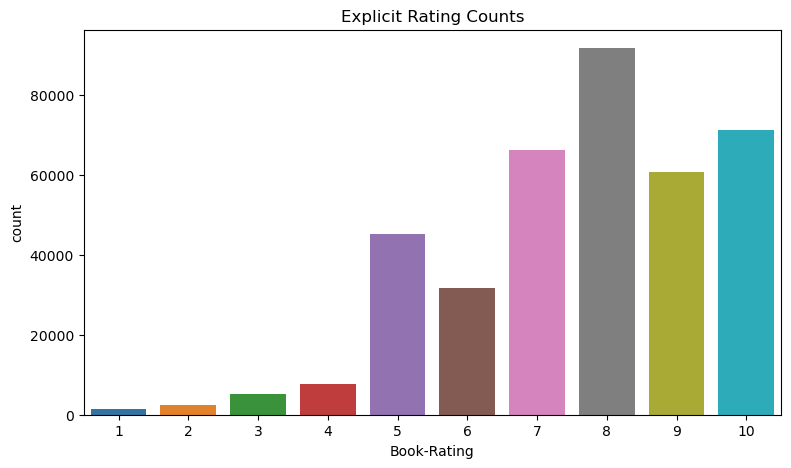

In [46]:
plt.figure(figsize=(9, 5))
plt.title('Explicit Rating Counts')
sns.countplot(x = 'Book-Rating', data = rating_explicit);

Function for cleaning title text using Regex Library

In [47]:
def clean_text(text):
    #removal of url
    text = re.sub(r'https?://\S+|www\.\S+|http?://\S+',' ',text) 
    
    #removal of html tags
    text = re.sub(r'<.*?>',' ',text) 
    
    text = re.sub("["
                           u"\U0001F600-\U0001F64F"  # removal of emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",' ',text)
    
    
    #remove newline char
    text = re.sub('\n', '', text)
    
    return text

Applying clean_text() function on bookTitle column

In [49]:
# Apply the clean_text function to the bookTitle column
books['Book-Title'] = books['Book-Title'].apply(lambda x: clean_text(x))


In [50]:
books['Book-Title']

0                                       Classical Mythology
1                                              Clara Callan
2                                      Decision in Normandy
3         Flu: The Story of the Great Influenza Pandemic...
4                                    The Mummies of Urumchi
                                ...                        
271355                           There's a Bat in Bunk Five
271356                              From One to One Hundred
271357    Lily Dale : The True Story of the Town that Ta...
271358                          Republic (World's Classics)
271359    A Guided Tour of Rene Descartes' Meditations o...
Name: Book-Title, Length: 271360, dtype: object

Merging Books and Ratings data using pd.merge()

In [51]:
merged_data = pd.merge(books, ratings_new, on='ISBN')
merged_data =  merged_data.sort_values('ISBN', ascending=True)
merged_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
1013651,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,171118,8
968138,0001010565,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,86123,0
968139,0001010565,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,209516,0
542150,0001046438,Liar,Stephen Fry,0,Harpercollins Uk,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,23902,9
788100,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,196149,0


# 3. Data Exploration

Visualising top 30 most read books

Using Series.value_counts() and sns.barplot for creating data and visualisation respectively

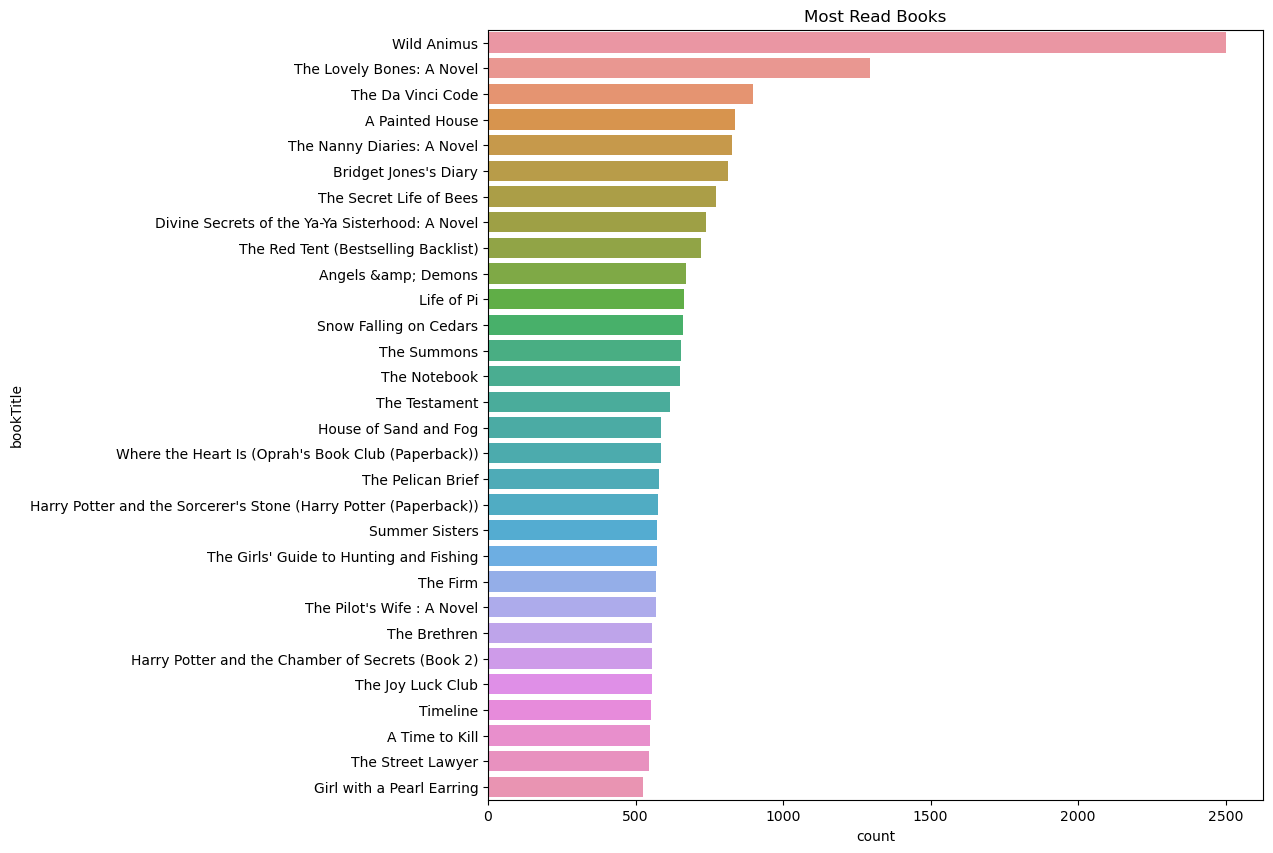

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the most read books by counting occurrences of each title
most_read = merged_data['Book-Title'].value_counts().reset_index()

# Rename columns for clarity
most_read.columns = ['bookTitle', 'count']

# Plotting the 30 most read books
plt.figure(figsize=(10, 10))
plt.title("Most Read Books")
sns.barplot(x='count', y='bookTitle', data=most_read.head(30))

# Show the plot
plt.show()



# Top rated books(average rating according to number of users)

We may observe many books with average rating equal to 10 and 0 as many of the books are rated only once, hence this can't show us a good visualisation

In [56]:
top_rated = merged_data[['Book-Title', 'Book-Rating']]
top_rated = top_rated.groupby('Book-Title', as_index=False)['Book-Rating'].mean()
top_rated = top_rated.sort_values('Book-Rating', ascending=False).reset_index(drop=True)
top_rated = top_rated[['Book-Title', 'Book-Rating']]

top_rated.head()


,Book-Title,Book-Rating
0,Film Is: The International Free Cinema,10.0
1,More Secrets of Happy Children: Embrace Your P...,10.0
2,Jo's Boys : From the Original Publisher,10.0
3,The Vanished Priestess : An Annie Szabo Mystery,10.0
4,Game and Hunting,10.0


In [57]:
top_rated.tail()

,Book-Title,Book-Rating
241066,Invaders of the Planet Earth (Choose Your Own ...,0.0
241067,Sammy Discovers the Alphabet (Learn-With-Sammy),0.0
241068,Sammy Carducci's Guide to Women,0.0
241069,Sammle mir Kiesel am FluÃ?Â?. Mehr als eine Li...,0.0
241070,TRAVELLING MAN,0.0


# Visualising top 30 most read books with there average ratings
Using DataFrame.groupby() and DataFrame.sort_values() for ploting a barplot

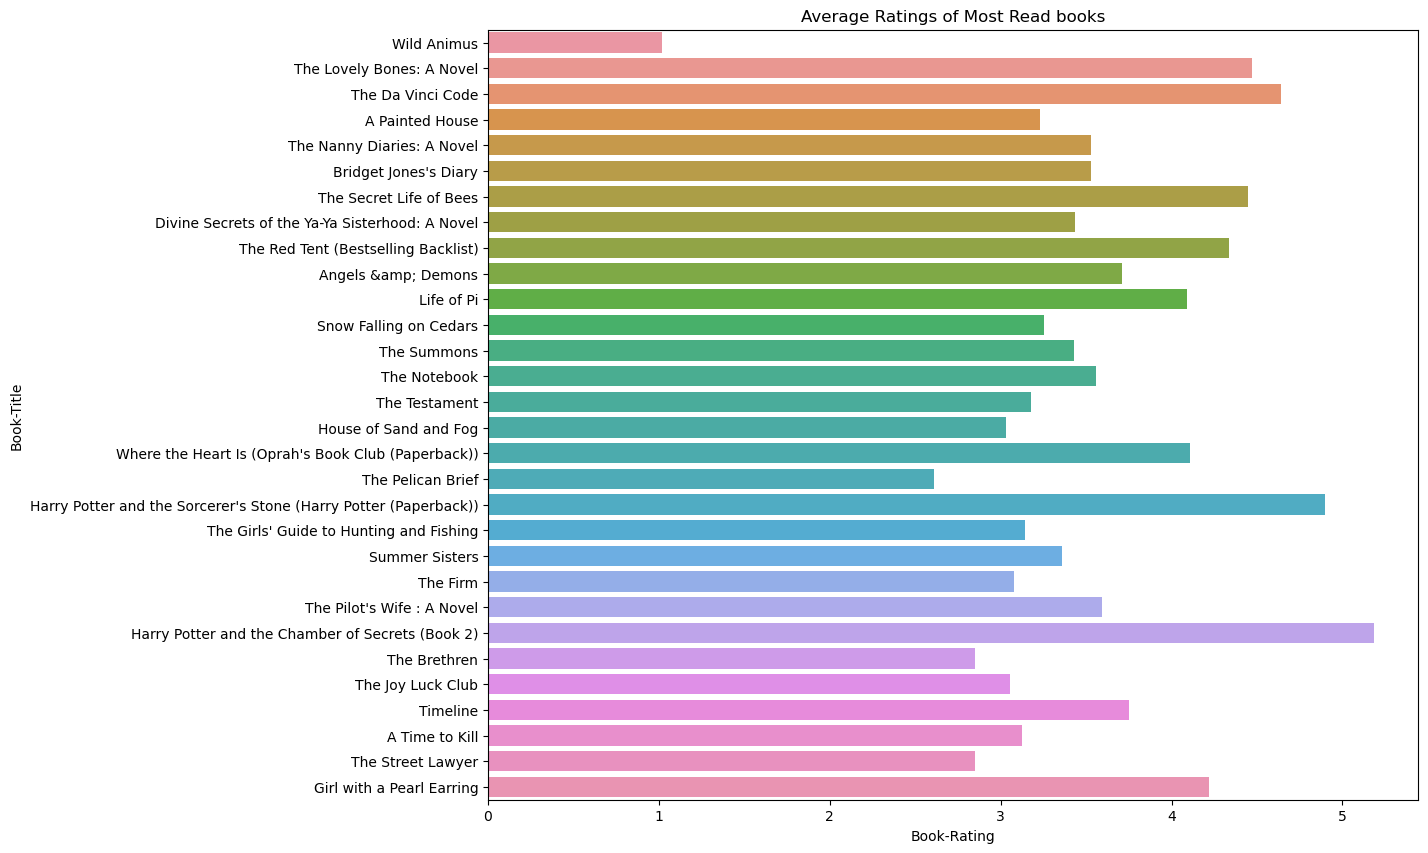

In [59]:
avg_data = merged_data.groupby('Book-Title', as_index=False)['Book-Rating'].mean()
temp = merged_data['Book-Title'].value_counts().reset_index()
temp.columns = ['Book-Title','count']
most_rated_by_reads = pd.merge(avg_data,temp,on='Book-Title')

most_rated_by_reads = most_rated_by_reads.sort_values('count',ascending=False)

plt.figure(figsize=(12,10))
plt.title("Average Ratings of Most Read books")
sns.barplot(x = 'Book-Rating', y = 'Book-Title', data = most_rated_by_reads.head(30));

# Visualising Count of Books with a specific length
Creating title_length data for every title in bookTitle column and ploting a histplot

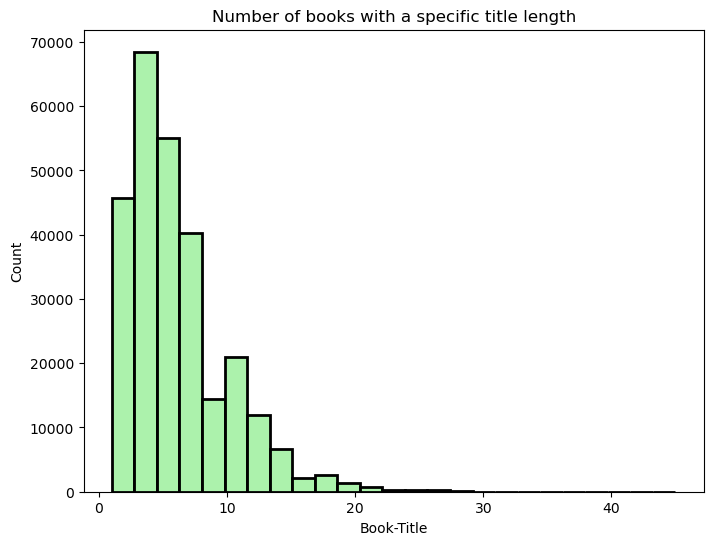

In [61]:
title_length = books['Book-Title'].str.split().map(lambda x: len(x))
plt.figure(figsize=(8,6))
plt.title('Number of books with a specific title length')
sns.histplot(title_length, bins=25, color = 'lightgreen', linewidth = 2, edgecolor = 'black');

# Visualising top 30 years with most book being published
We count the number of times a book is published in a particular year and plot a barplot

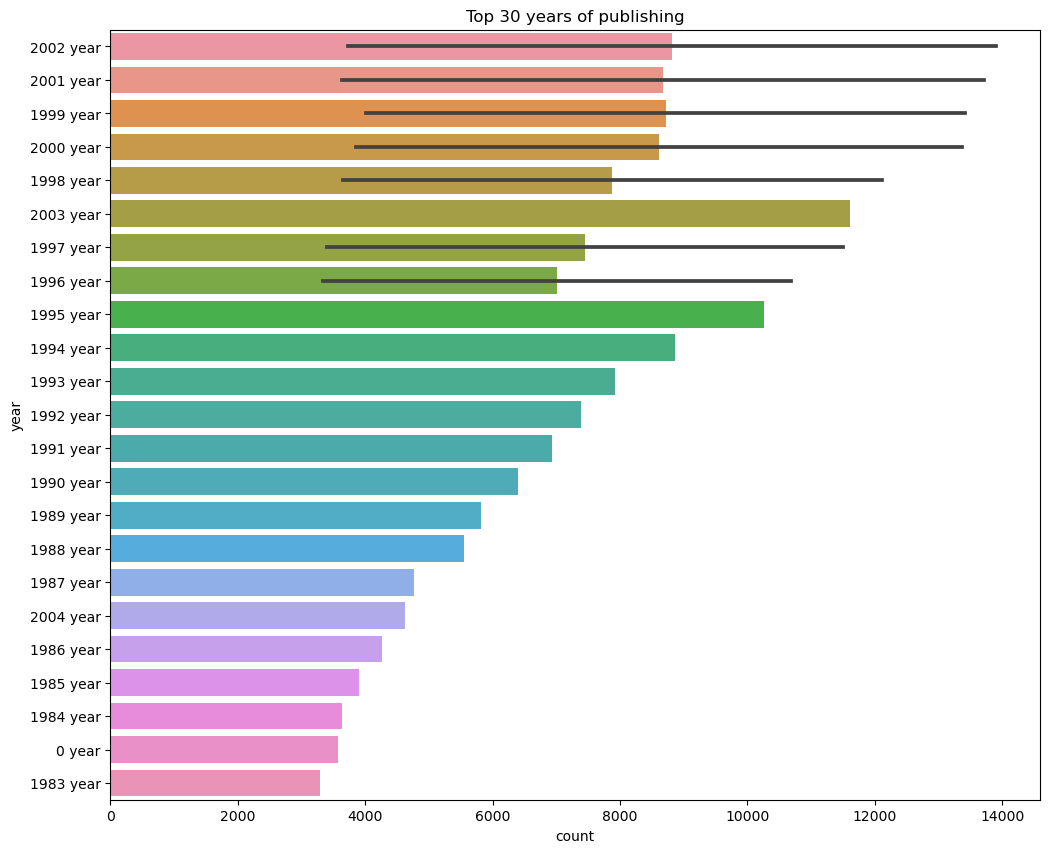

In [62]:
yearOP = books['Year-Of-Publication'].value_counts().reset_index()

yearOP.columns = ['value', 'count']

yearOP['year'] = yearOP['value'].astype(str) + ' year'

yearOP = yearOP.sort_values('count',ascending=False)

plt.figure(figsize=(12,10))
plt.title('Top 30 years of publishing')
sns.barplot(data = yearOP.head(30), x='count', y="year");

# Visualising top 30 authors with most books
We count the number of times a book written by an author and plot a barplot for the top 30 authors

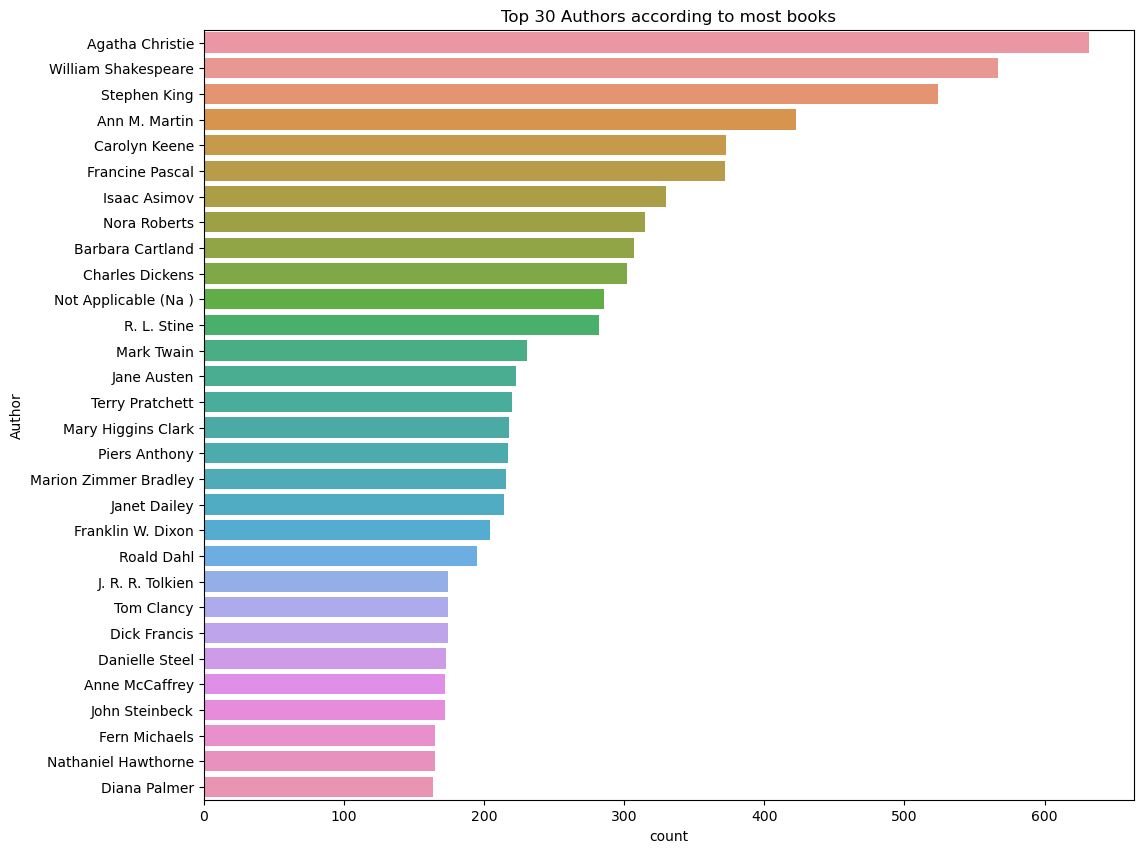

In [63]:
top_author = books['Book-Author'].value_counts().reset_index()
top_author.columns = ['Author', 'count']
top_author['Author'] = top_author['Author']
top_author = top_author.sort_values('count',ascending=False)

plt.figure(figsize=(12,10))
plt.title('Top 30 Authors according to most books')
sns.barplot(data = top_author.head(30), x = 'count', y = 'Author');

# Visualising top 30 publishers with most books
We count the number of books published by a publisher and plot top 30 of them

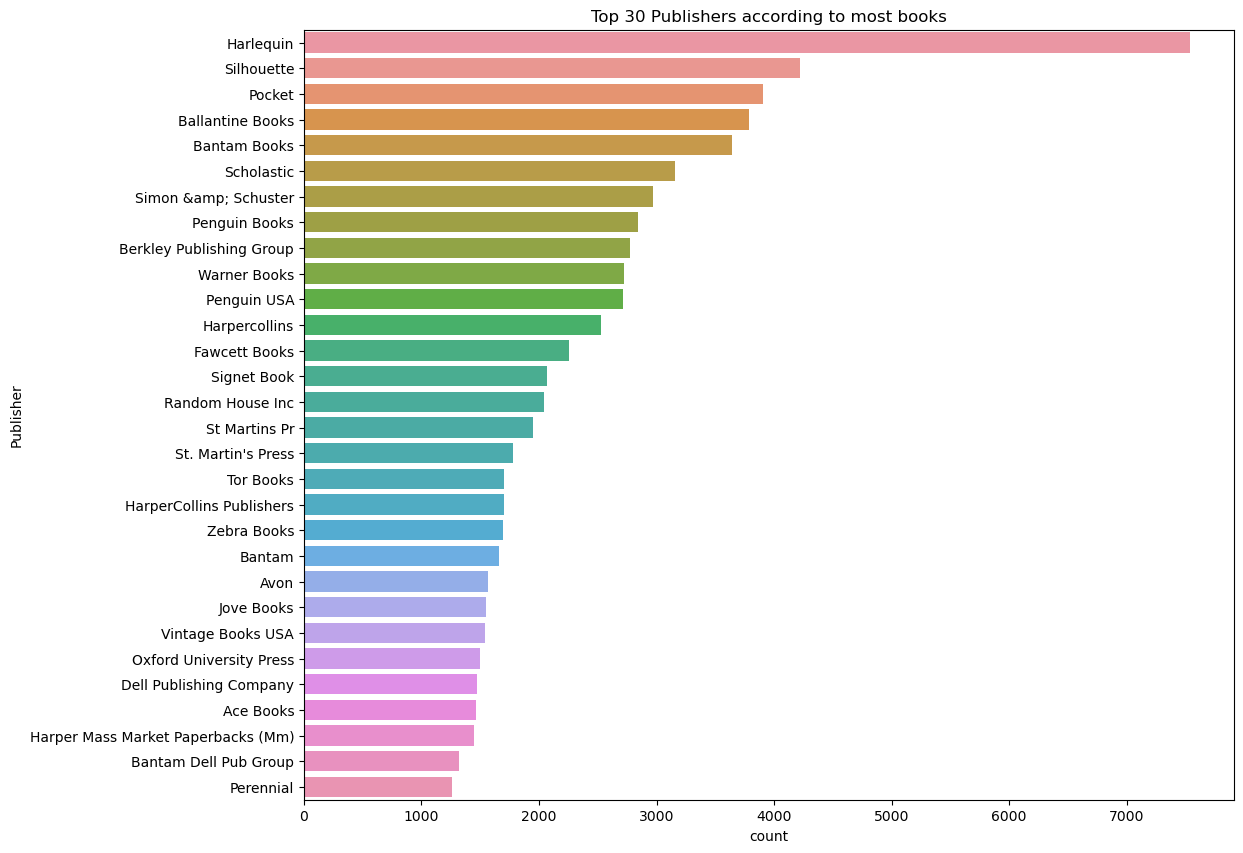

In [64]:
top_publisher = books['Publisher'].value_counts().reset_index()
top_publisher.columns = ['Publisher', 'count']
top_publisher['Publisher'] = top_publisher['Publisher']
top_publisher = top_publisher.sort_values('count',ascending=False)

plt.figure(figsize=(12,10))
plt.title('Top 30 Publishers according to most books')
sns.barplot(data = top_publisher.head(30), x = 'count', y = 'Publisher');

# Visualising the age distribution of the users

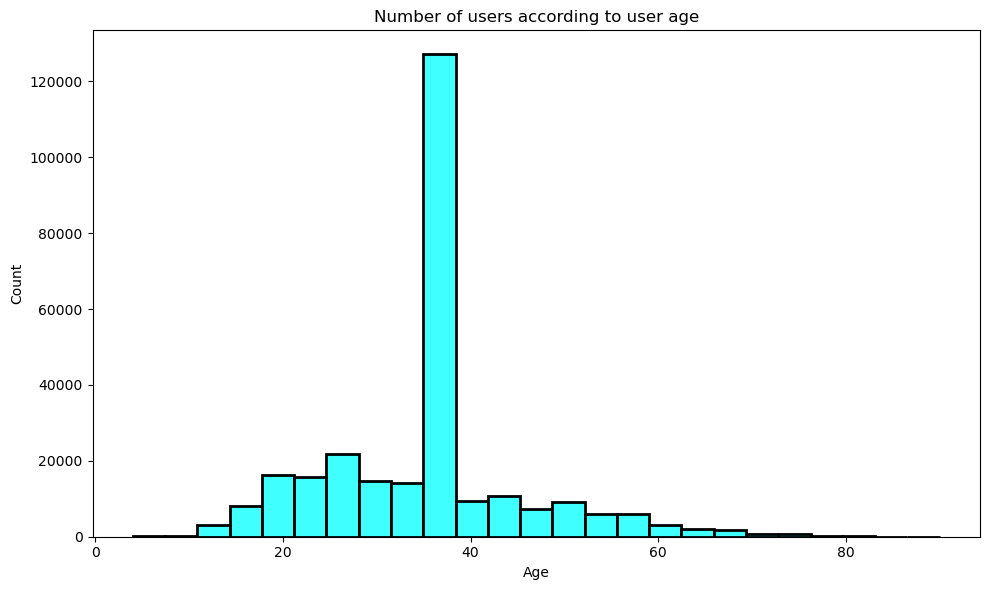

In [65]:
user_age = users.Age
plt.figure(figsize=(10,6), tight_layout=True)
plt.title('Number of users according to user age')
sns.histplot(user_age, bins=25, linewidth = 2, color = 'cyan', edgecolor = 'black');

# Visualising most frequent words in Author, Title and Publisher string
Creating string variables for bookAuthor, bookTitle and publisher, also creating a function to plot WordCloud()

In [67]:
author_string = " ".join(books['Book-Author'].astype(str))
title_string = " ".join(books['Book-Title'].astype(str))
publisher_string = " ".join(books['Publisher'].astype(str))
stop_words = set(STOPWORDS)

def wordcloud(string,title ="unknown"):
    wc = WordCloud(width=800,height=500,mask=None,random_state=21,
                   stopwords=stop_words).generate(string)
    fig=plt.figure(figsize=(16,8))
    plt.title(title)
    plt.axis('off')
    plt.imshow(wc)

Displaying most frequent words in author names

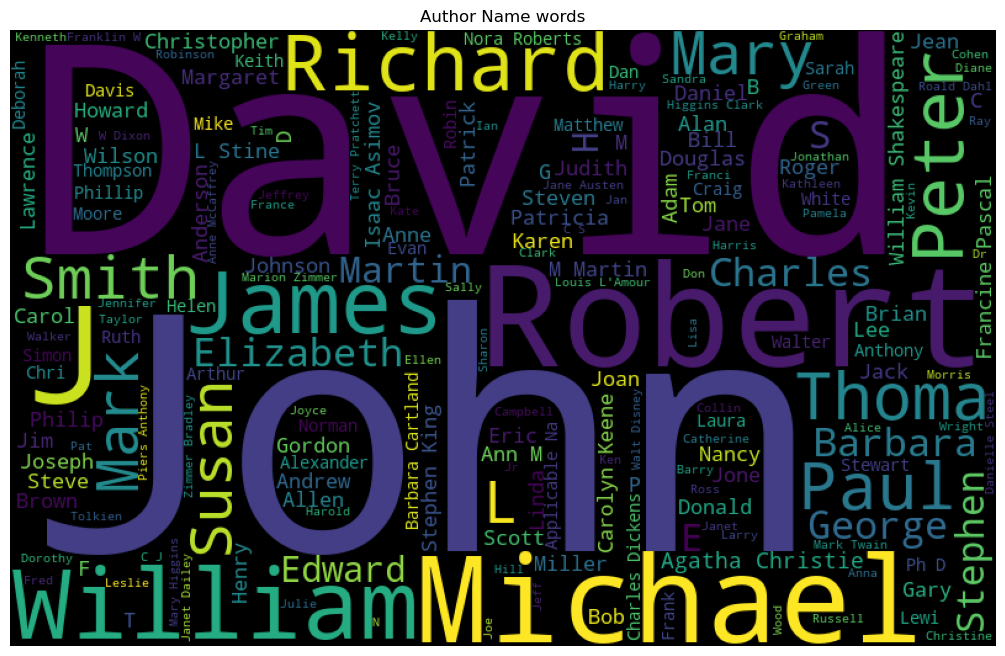

In [68]:
wordcloud(author_string,'Author Name words')

Displaying most frequent words in title text

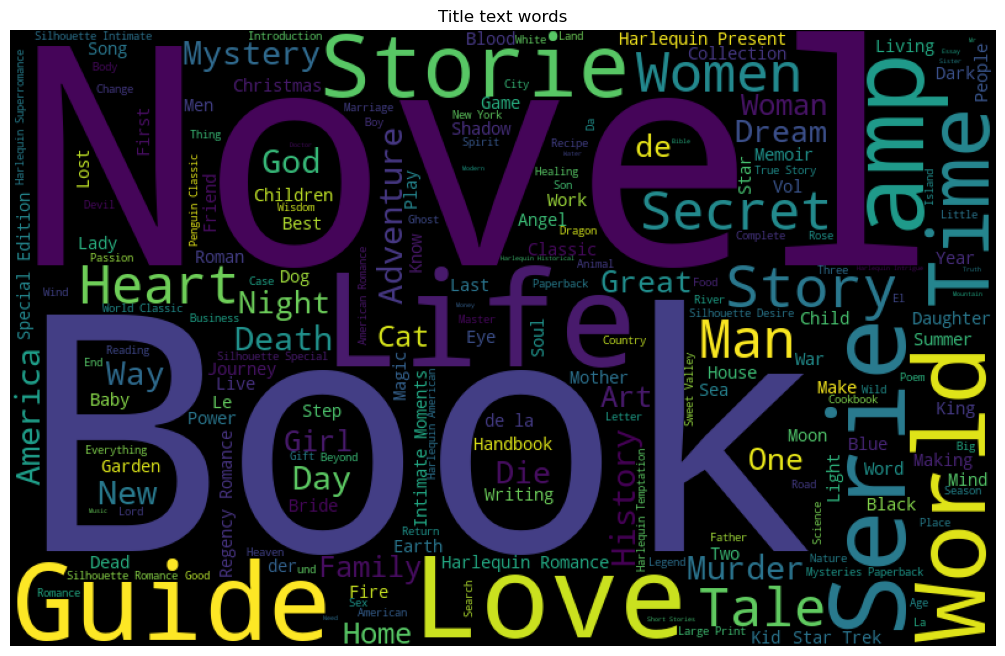

In [69]:
wordcloud(title_string,'Title text words')

Displaying most frequent words in publisher names

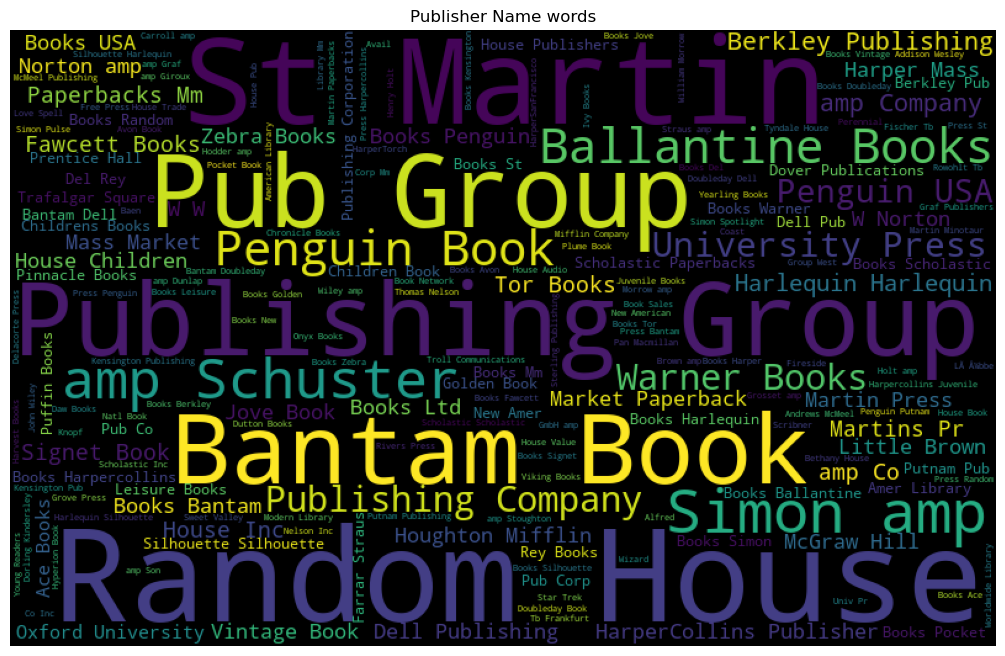

In [70]:
wordcloud(publisher_string,'Publisher Name words')

# Popularity Based Recommencer system

In [71]:
ratings_with_name=ratings.merge(books,on='ISBN')

In [72]:
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [73]:
num_rating_df=ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()

In [74]:
num_rating_df

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [76]:
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [77]:
avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [78]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [79]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [80]:
popular_df

,Book-Title,num_ratings,avg_rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [81]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [82]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

# Collaborative Filtering Based Recommender System

In [83]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index

In [84]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]

In [85]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [86]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [87]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [88]:
pt.fillna(0,inplace=True)

In [89]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
from sklearn.metrics.pairwise import cosine_similarity

In [91]:
similarity_scores = cosine_similarity(pt)

In [92]:
similarity_scores.shape

(706, 706)

In [93]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [94]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg']]

In [95]:
pt.index[545]

"The Handmaid's Tale"

In [96]:
pt.index[200]

"Fortune's Rocks : A Novel"

In [97]:
pt.index[30]

'About a Boy'